#**Optical Inter-Satellite Link Model**

#Equation for Inter-Satellite Links

**PR = PT.ηT.ηR.GT.GR.LT.LR.LPS**

#Equation for Uplink/Downlink

**PR = PT.ηT.ηR.GT.GR.LT.LR.LA.LPG**

is used in the context of link budget analysis for free-space optical communication. This equation calculates the received power (PR) based on several factors influencing the transmission and reception of the signal. Here’s a breakdown of each term:

PR: Received power (W) - the power of the signal received by the receiver.

PT: Transmitter power (W) - the initial power of the signal transmitted from the source.

ηT: Transmitter optics efficiency - a factor representing the efficiency of the transmitter optics, which accounts for losses in the transmitter's optical components.

ηR: Receiver optics efficiency - a factor representing the efficiency of the receiver optics, which accounts for losses in the receiver's optical components.

GT: Transmitter gain - a measure of how well the transmitter focuses the signal in the direction of the receiver. Higher gain indicates better focusing.

GR: Receiver gain - a measure of how well the receiver collects the incoming signal. Higher gain indicates better signal collection.

LT: Transmitter pointing loss - the loss of signal strength due to the pointing error of the transmitter. It accounts for the misalignment of the transmitter beam.

LR: Receiver pointing loss - the loss of signal strength due to the pointing error of the receiver. It accounts for the misalignment of the receiver beam.

LPS: Free-space path loss - the reduction in signal strength as it propagates through free space over a distance 𝑑. It is affected by factors like the distance between the transmitter and receiver and the wavelength of the signal.

LA: Atmospheric Attenuation Losses including scattering

LPG: free space path loss for uplink and downlink communication.

# **Transmitted Power vs Link Distance - Inter-Satellite**

 Distance (km)  Free-Space Path Loss (dB)  Transmitted Power (dBm)  Transmitted Power (W)
        1000.0                -258.177563                20.823429               0.120877
        2000.0                -264.198163                26.844029               0.483507
        3000.0                -267.719988                30.365854               1.087891
        4000.0                -270.218763                32.864629               1.934029
        5000.0                -272.156963                34.802829               3.021920
        6000.0                -273.740588                36.386454               4.351565
        7000.0                -275.079524                37.725390               5.922963
        8000.0                -276.239363                38.885229               7.736115
        9000.0                -277.262414                39.908280               9.791020
       10000.0                -278.177563                40.823429              12.087680
       110

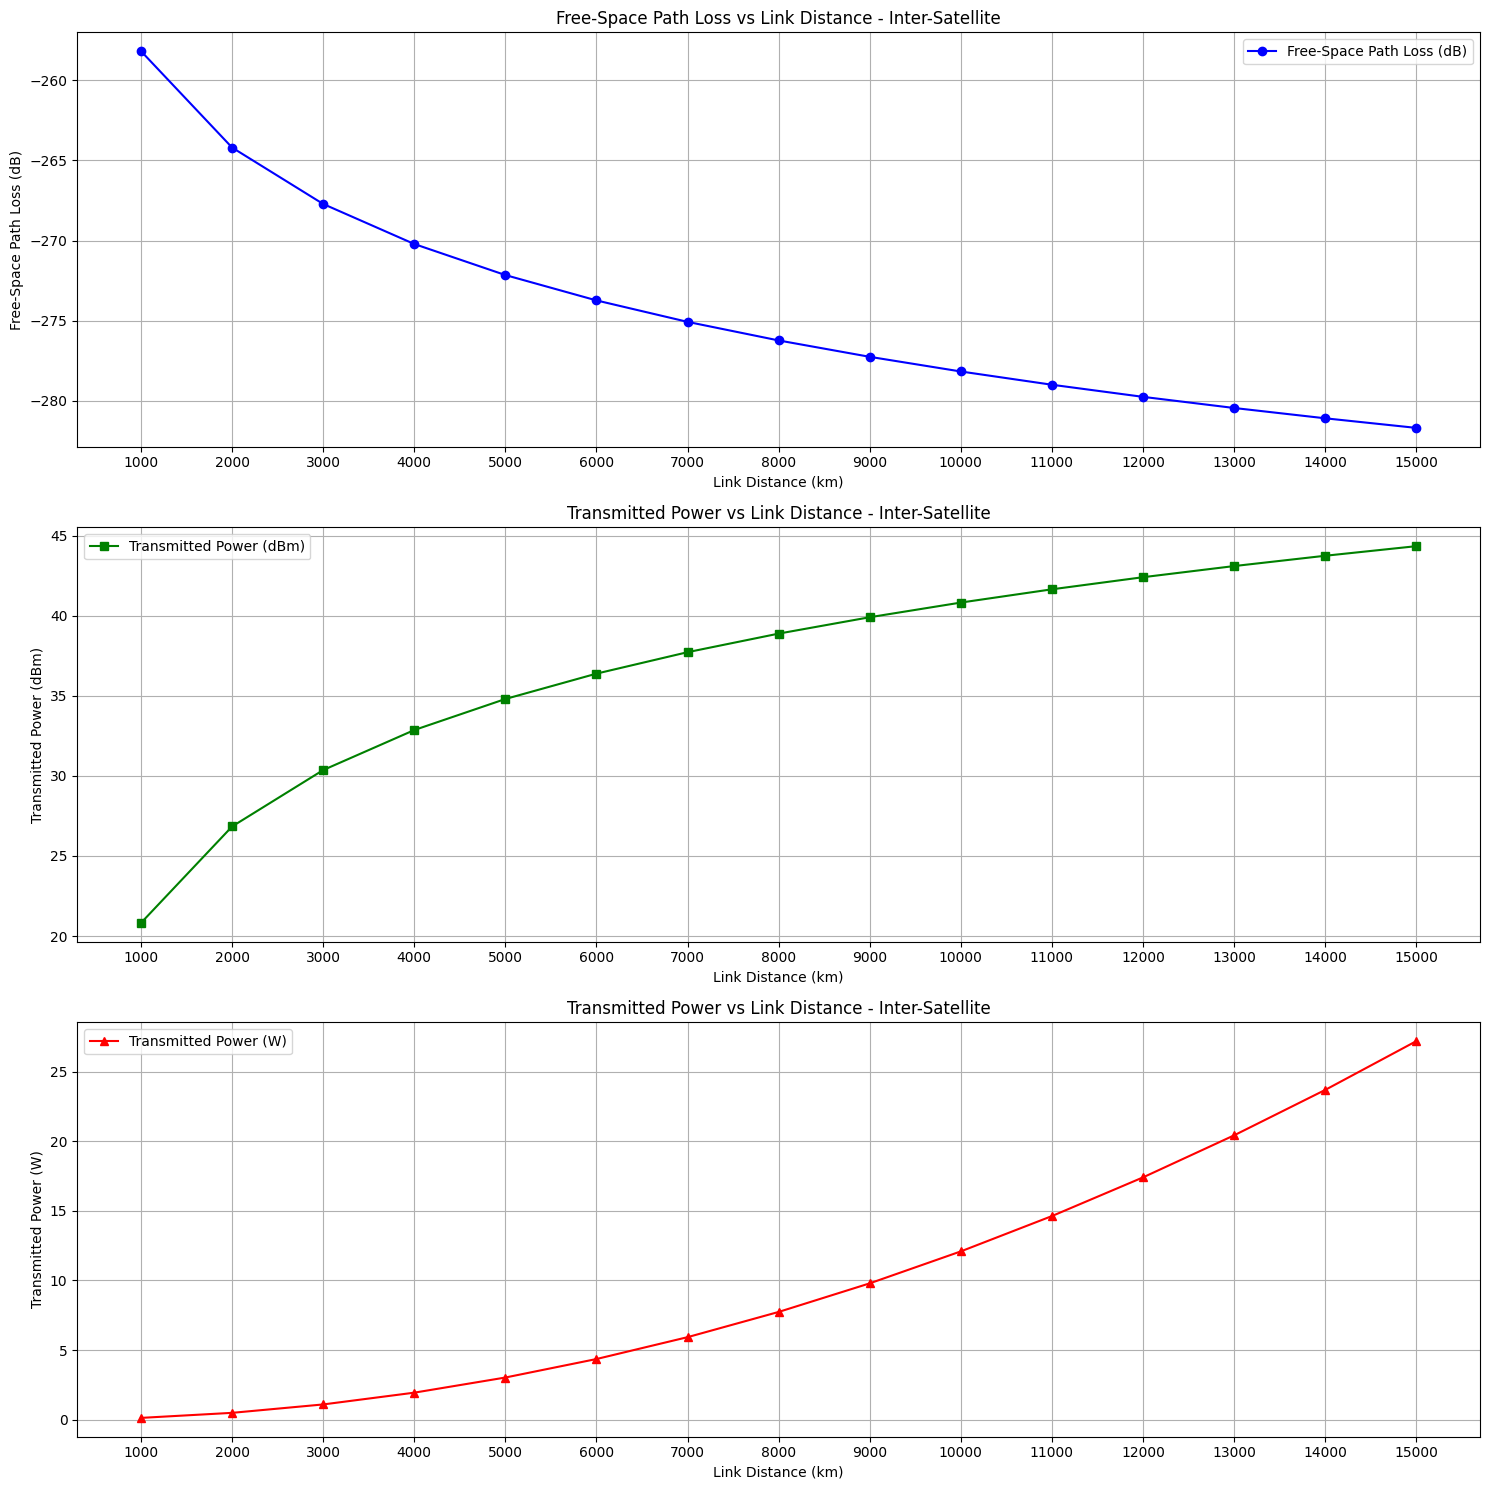

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
sigma_T = 1.5e-6  # Transmitter pointing error (radians)
sigma_R = 1.5e-6  # Receiver pointing error (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
P_req = 10**(P_req_dBm / 10) / 1000  # Receiver sensitivity (W)


# Inter-Satellite Link Budget Calculation
def inter_satellite_link_budget(d_SS):
    # Transmitter Gain
    G_T = 16 / theta_T**2  # Transmitter Gain (approximation)

    # Receiver Gain
    G_R = (np.pi * D_R / wavelength)**2  # Receiver Gain

    # Transmitter Pointing Loss
    L_T = np.exp(-G_T * sigma_T**2)

    # Receiver Pointing Loss
    L_R = np.exp(-G_R * sigma_R**2)

    # Free-space Path Loss
    L_PS = (wavelength / (4 * np.pi * d_SS))**2
    L_PS_dB = 10 * np.log10(L_PS)

    # Calculate required received power with link margin
    P_R = P_req * 10**(LM / 10)  # Convert link margin from dB

    # Calculate transmitted power
    P_T = P_R / (eta_T * eta_R * G_T * G_R * L_T * L_R * L_PS)
    P_T_dBm = 10 * np.log10(P_T * 1000)  # Convert W to dBm

    return L_PS_dB, P_T_dBm, P_T

# Distance range in 1000 km intervals
d_SS_range = np.arange(1000e3, 16000e3, 1000e3)  # Distances from 1000 km to 15000 km

# Calculate parameters
results = [inter_satellite_link_budget(d_SS) for d_SS in d_SS_range]
L_PS_dB_vals, P_T_dBm_vals, P_T_W_vals = zip(*results)

# Create a DataFrame for the results
data = {
    'Distance (km)': d_SS_range / 1e3,
    'Free-Space Path Loss (dB)': L_PS_dB_vals,
    'Transmitted Power (dBm)': P_T_dBm_vals,
    'Transmitted Power (W)': P_T_W_vals
}

df_results = pd.DataFrame(data)

# Display the DataFrame
print(df_results.to_string(index=False))

# Optionally, you can save the DataFrame to a CSV file
df_results.to_csv('inter_satellite_link_budget_results.csv', index=False)

# Advanced Visualization
plt.figure(figsize=(15, 15))

# Plot Free-Space Path Loss
plt.subplot(3, 1, 1)
plt.plot(d_SS_range / 1e3, L_PS_dB_vals, 'b-o', label='Free-Space Path Loss (dB)')
plt.xlabel('Link Distance (km)')
plt.ylabel('Free-Space Path Loss (dB)')
plt.title('Free-Space Path Loss vs Link Distance - Inter-Satellite')
plt.xticks(np.arange(1000, 16000, 1000))
plt.legend()
plt.grid(True)

# Plot Transmission Power (dBm)
plt.subplot(3, 1, 2)
plt.plot(d_SS_range / 1e3, P_T_dBm_vals, 'g-s', label='Transmitted Power (dBm)')
plt.xlabel('Link Distance (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Transmitted Power vs Link Distance - Inter-Satellite')
plt.xticks(np.arange(1000, 16000, 1000))
plt.legend()
plt.grid(True)

# Plot Transmission Power (W)
plt.subplot(3, 1, 3)
plt.plot(d_SS_range / 1e3, P_T_W_vals, 'r-^', label='Transmitted Power (W)')
plt.xlabel('Link Distance (km)')
plt.ylabel('Transmitted Power (W)')
plt.title('Transmitted Power vs Link Distance - Inter-Satellite')
plt.xticks(np.arange(1000, 16000, 1000))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



# **Transmitted Power vs Link Distance for Different Pointing Errors - Inter-Satellite**


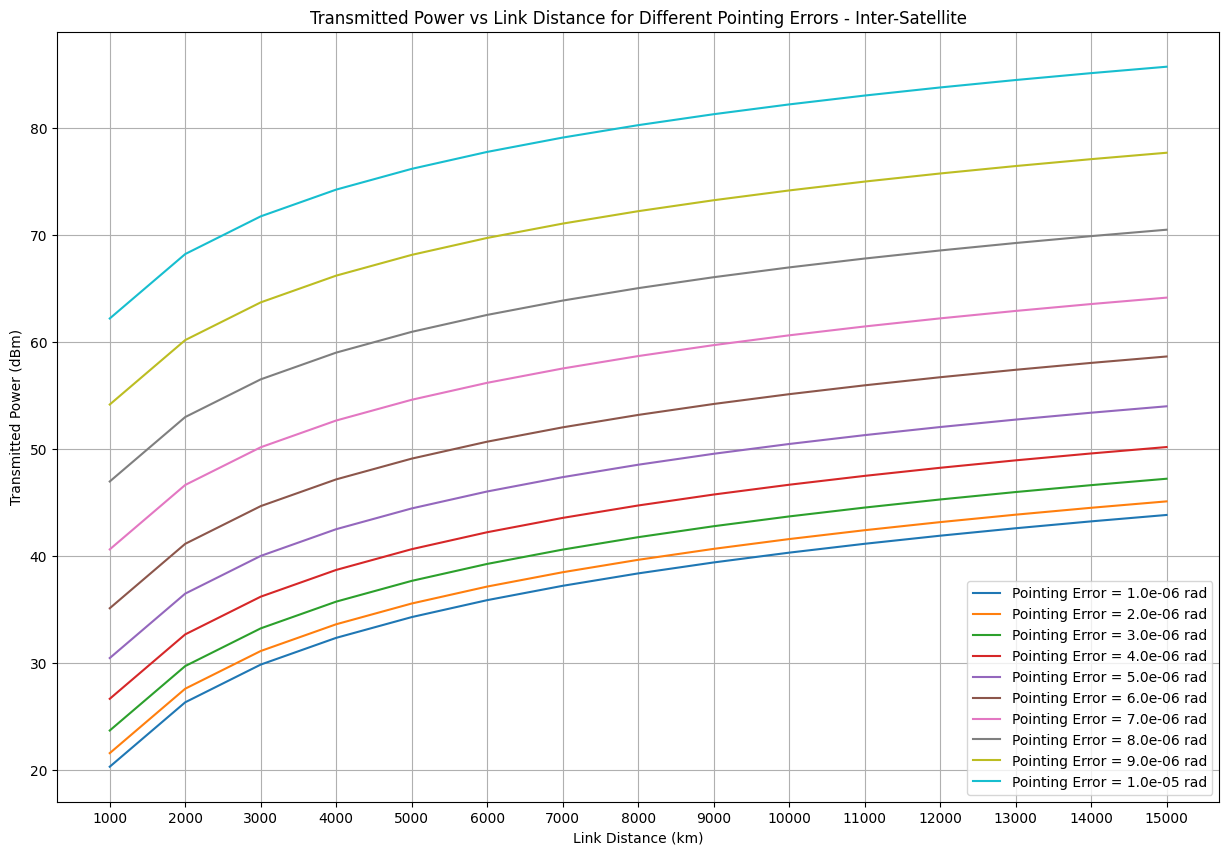

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
P_req = 10**(P_req_dBm / 10) / 1000  # Receiver sensitivity (W)

# Function to calculate Inter-Satellite Link Budget with different pointing errors
def inter_satellite_link_budget(d_SS, sigma_T, sigma_R):
    G_T = 16 / theta_T**2  # Transmitter Gain (approximation)
    G_R = (np.pi * D_R / wavelength)**2  # Receiver Gain

    # Corrected Pointing Loss calculations using the provided formulas
    L_T = np.exp(-G_T * sigma_T**2)  # Transmitter Pointing Loss
    L_R = np.exp(-G_R * sigma_R**2)  # Receiver Pointing Loss

    L_PS = (wavelength / (4 * np.pi * d_SS))**2  # Free-space Path Loss
    L_PS_dB = 10 * np.log10(L_PS)
    P_R = P_req * 10**(LM / 10)  # Convert link margin from dB
    P_T = P_R / (eta_T * eta_R * G_T * G_R * L_T * L_R * L_PS)
    P_T_dBm = 10 * np.log10(P_T * 1000)  # Convert W to dBm
    return L_PS_dB, P_T_dBm, P_T

# Distance range in 1000 km intervals
d_SS_range = np.arange(1000e3, 16000e3, 1000e3)  # Distances from 1000 km to 15000 km

# Pointing errors from 1e-6 to 10e-6 in 10 steps
pointing_errors = np.linspace(1e-6, 10e-6, 10)

# Plotting
plt.figure(figsize=(15, 10))

for sigma_T in pointing_errors:
    sigma_R = sigma_T  # Assuming same pointing error for both transmitter and receiver
    # Calculate parameters for each pointing error scenario
    results = [inter_satellite_link_budget(d_SS, sigma_T, sigma_R) for d_SS in d_SS_range]
    L_PS_dB_vals, P_T_dBm_vals, P_T_W_vals = zip(*results)

    # Plot Transmission Power (dBm)
    plt.plot(d_SS_range / 1e3, P_T_dBm_vals, label=f'Pointing Error = {sigma_T:.1e} rad')

# Finalize plots for Transmission Power (dBm)
plt.xlabel('Link Distance (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Transmitted Power vs Link Distance for Different Pointing Errors - Inter-Satellite')
plt.xticks(np.arange(1000, 16000, 1000))
plt.legend()
plt.grid(True)
plt.show()


# **Transmitted Power vs. Slant Distance - Uplink/Downlink**

    hS (km)     dGS (km)    LPG (dB)   Im (dB)   Ig (dB)   LA (dB)   PT (dBm)  \
0       300   451.234558  251.265610 -0.154383 -0.328366 -0.482749  12.476945   
1       400   596.726278  253.693067 -0.154383 -0.328366 -0.482749  14.904401   
2       500   739.911295  255.561156 -0.154383 -0.328366 -0.482749  16.772491   
3       600   880.988522  257.076968 -0.154383 -0.328366 -0.482749  18.288303   
4       700  1020.132181  258.350692 -0.154383 -0.328366 -0.482749  19.562026   
5       800  1157.495782  259.447952 -0.154383 -0.328366 -0.482749  20.659286   
6       900  1293.215327  260.410980 -0.154383 -0.328366 -0.482749  21.622314   
7      1000  1427.411915  261.268550 -0.154383 -0.328366 -0.482749  22.479884   
8      1100  1560.193861  262.041135 -0.154383 -0.328366 -0.482749  23.252469   
9      1200  1691.658457  262.743817 -0.154383 -0.328366 -0.482749  23.955151   
10     1300  1821.893432  263.388023 -0.154383 -0.328366 -0.482749  24.599357   
11     1400  1950.978176  26

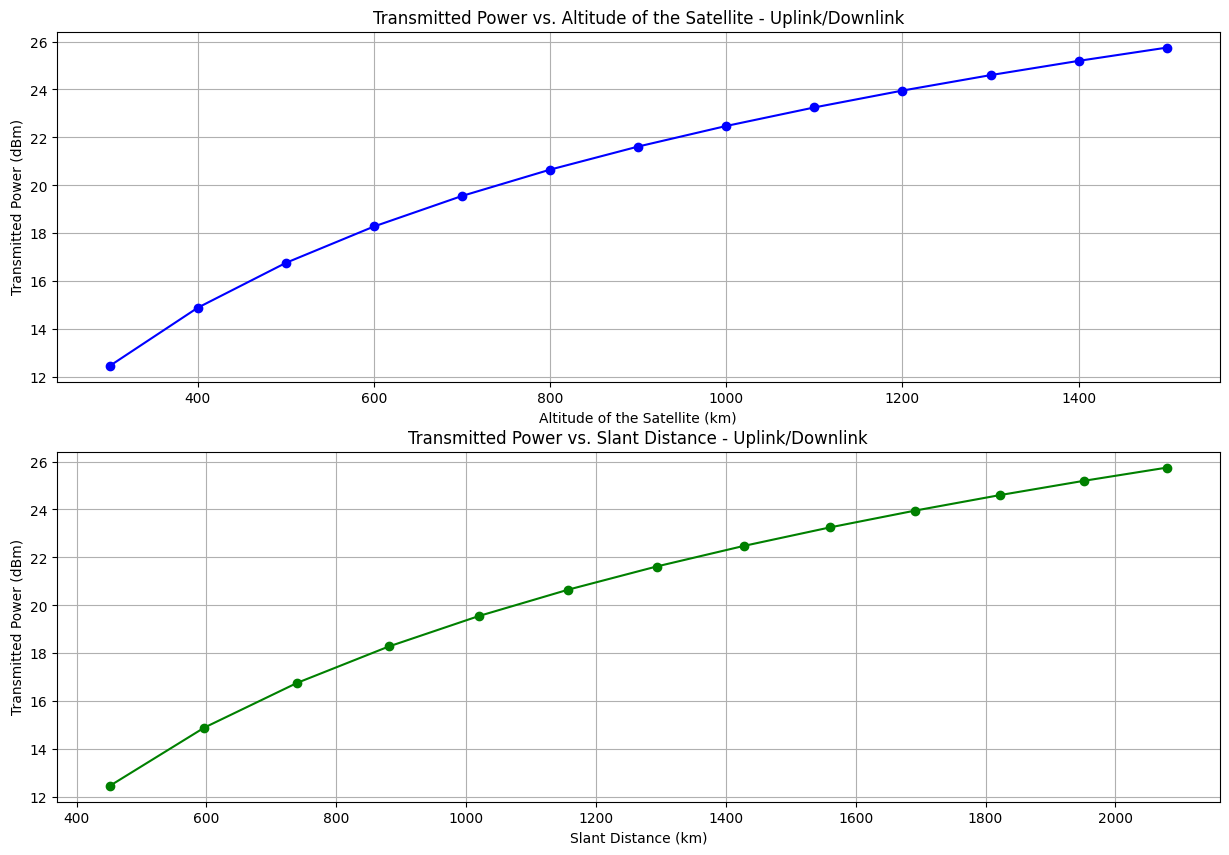

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
sigma_T = 1.5e-6  # Transmitter pointing error (radians)
sigma_R = 1.5e-6  # Receiver pointing error (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
P_req = 10**(P_req_dBm / 10) / 1000  # Receiver sensitivity (W)

# Earth's radius and height of ground station
RE = 6378.1  # Radius of the Earth in km
hE = 1  # Ground station height above mean sea level in km

# Elevation angle
thetaE = 40  # Elevation angle in degrees

# Optical efficiencies, gains, and pointing losses in dB
eta_T_dB = 10 * np.log10(eta_T)
eta_R_dB = 10 * np.log10(eta_R)
G_T_dB = 10 * np.log10(16 / theta_T**2)  # Transmitter gain in dB
G_R_dB = 10 * np.log10((D_R * np.pi / wavelength)**2)  # Receiver gain in dB
L_T_dB = 10 * np.log10(np.exp(-G_T_dB * sigma_T**2))  # Transmitter pointing loss in dB
L_R_dB = 10 * np.log10(np.exp(-G_R_dB * sigma_R**2))  # Receiver pointing loss in dB

# Function to calculate slant distance
def calc_dGS(hS, thetaE):
    R = RE + hE
    H = hS - hE
    dGS = R * (np.sqrt(((R + H) / R)**2 - (np.cos(np.radians(thetaE)))**2) - np.sin(np.radians(thetaE)))
    return dGS

# Function to calculate free-space path loss
def calc_LPG(dGS):
    LPG = (wavelength / (4 * np.pi * dGS * 1e3))**2  # Convert dGS from km to meters
    LPG_dB = -10 * np.log10(LPG)  # Free-space path loss in dB
    return LPG_dB

# Function to calculate Mie scattering loss (Im) using the derived formula
def calc_Im(h):
    # Coefficients
    a = -0.000545 * (1.55)**2 + 0.002 * 1.55 - 0.0038
    b = 0.00628 * (1.55)**2 - 0.0232 * 1.55 + 0.00439
    c = -0.028 * (1.55)**2 + 0.101 * 1.55 - 0.18
    d = -0.228 * (1.55)**3 + 0.922 * (1.55)**2 - 1.26 * 1.55 + 0.719

    # Calculate rho
    rho = a * h**3 + b * h**2 + c * h + d

    # Calculate Im
    Im = np.exp(-rho / np.sin(np.radians(thetaE)))
    Im_dB = 10 * np.log10(Im)
    return Im_dB

# Function to calculate atmospheric attenuation due to geometrical scattering
def calc_Ig(hA, hE, thetaE):
    LW = 0.5  # Liquid water content in g/m-3
    N = 3.128e-4  # Cloud number concentration in cm-3
    phi = 1.6  # Particle size related coefficient
    V = 1.002 / (LW * N)**0.6473
    thetaA = (3.91 / V) * (wavelength / 550e-9)**(-phi)  # Convert lambda to meters
    dA = (hA - hE) / np.sin(np.radians(thetaE))
    Ig = np.exp(np.clip(-thetaA * dA, -700, 700))  # Clipping to avoid overflow
    Ig_dB = 10 * np.log10(Ig)  # Corrected calculation of Ig in dB
    return Ig_dB

# Function to calculate total atmospheric attenuation
def calc_LA(Im_dB, Ig_dB):
    LA_dB = Im_dB + Ig_dB
    return LA_dB

# Function to calculate transmitted power
def calc_PT(P_req_dBm, LPG_dB, LA_dB, L_T_dB, L_R_dB, eta_T_dB, eta_R_dB, G_T_dB, G_R_dB):
    PT_dBm = P_req_dBm - eta_T_dB - eta_R_dB - G_T_dB - G_R_dB + L_T_dB + L_R_dB + LA_dB + LPG_dB + LM
    PT_W = 10**((PT_dBm - 30) / 10)
    return PT_dBm, PT_W

# Heights of satellites in km
heights = np.arange(300, 1600, 100)

# Arrays to store results
dGS_values = []
LPG_values = []
Im_values = []
Ig_values = []
LA_values = []
PT_dBm_values = []
PT_W_values = []

for hS in heights:
    dGS = calc_dGS(hS, thetaE)
    LPG_dB = calc_LPG(dGS)
    Im_dB = calc_Im(h=1)  # h is 1 km for this calculation
    Ig_dB = calc_Ig(hA=20, hE=hE, thetaE=thetaE)  # hA is the height of the troposphere layer of atmosphere in km
    LA_dB = calc_LA(Im_dB, Ig_dB)
    PT_dBm, PT_W = calc_PT(P_req_dBm, LPG_dB, LA_dB, L_T_dB, L_R_dB, eta_T_dB, eta_R_dB, G_T_dB, G_R_dB)

    dGS_values.append(dGS)
    LPG_values.append(LPG_dB)
    Im_values.append(Im_dB)
    Ig_values.append(Ig_dB)
    LA_values.append(LA_dB)
    PT_dBm_values.append(PT_dBm)
    PT_W_values.append(PT_W)

# Create a DataFrame to display the results
data = {
    'hS (km)': heights,
    'dGS (km)': dGS_values,
    'LPG (dB)': LPG_values,
    'Im (dB)': Im_values,
    'Ig (dB)': Ig_values,
    'LA (dB)': LA_values,
    'PT (dBm)': PT_dBm_values,
    'PT (W)': PT_W_values
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plotting the relationship between altitude, slant distance, and transmitted power
plt.figure(figsize=(15, 10))

# Subplot 1: PT vs. hS
plt.subplot(2, 1, 1)
plt.plot(df['hS (km)'], df['PT (dBm)'], marker='o', linestyle='-', color='b')
plt.xlabel('Altitude of the Satellite (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Transmitted Power vs. Altitude of the Satellite - Uplink/Downlink')
plt.grid(True)

# Subplot 2: PT vs. dGS
plt.subplot(2, 1, 2)
plt.plot(df['dGS (km)'], df['PT (dBm)'], marker='o', linestyle='-', color='g')
plt.xlabel('Slant Distance (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Transmitted Power vs. Slant Distance - Uplink/Downlink')
plt.grid(True)

plt.show()


# **Effect of Satellite Altitude on Slant Distance**

    hS (km)     dGS (km)
0       300   451.234558
1       400   596.726278
2       500   739.911295
3       600   880.988522
4       700  1020.132181
5       800  1157.495782
6       900  1293.215327
7      1000  1427.411915
8      1100  1560.193861
9      1200  1691.658457
10     1300  1821.893432
11     1400  1950.978176
12     1500  2078.984773


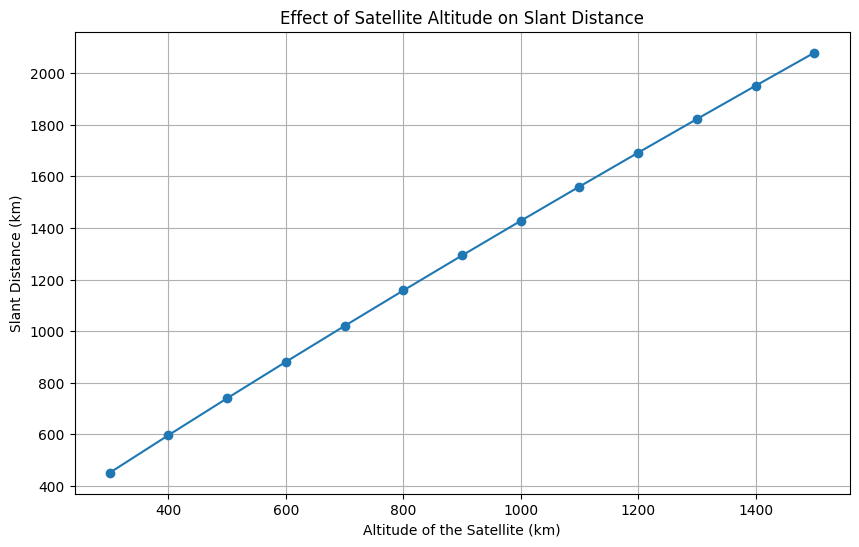

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
sigma_T = 1.5e-6  # Transmitter pointing error (radians)
sigma_R = 1.5e-6  # Receiver pointing error (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
P_req = 10**(P_req_dBm / 10) / 1000  # Receiver sensitivity (W)

# Earth's radius and height of ground station
RE = 6378.1  # Radius of the Earth in km
hE = 1  # Ground station height above mean sea level in km

# Elevation angle
thetaE = 40  # Elevation angle in degrees

# Function to calculate slant distance
def calc_dGS(hS, thetaE):
    R = RE + hE
    H = hS - hE
    dGS = R * (np.sqrt(((R + H) / R)**2 - (np.cos(np.radians(thetaE)))**2) - np.sin(np.radians(thetaE)))
    return dGS

# Heights of satellites in km
heights = np.arange(300, 1600, 100)

# Array to store slant distance results
dGS_values = []

for hS in heights:
    dGS = calc_dGS(hS, thetaE)
    dGS_values.append(dGS)

# Create a DataFrame to display the results
data = {
    'hS (km)': heights,
    'dGS (km)': dGS_values,
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plotting hS against slant distance
plt.figure(figsize=(10, 6))
plt.plot(df['hS (km)'], df['dGS (km)'], marker='o', linestyle='-')
plt.xlabel('Altitude of the Satellite (km)')
plt.ylabel('Slant Distance (km)')
plt.title('Effect of Satellite Altitude on Slant Distance')
plt.grid(True)
plt.show()


# **Elevation Angle vs. Distance Through Atmosphric - Uplink/Downlink**
and
# **Elevation Angle vs. Tranmitted Power - Uplink/Downlink**

   thetaE (degrees)  dGS (km)  dA (km)  LPG (dB)  Im (dB)  Ig (dB)  LA (dB)  \
0                10   1813.36   109.42    263.35    -0.57    -1.22    -1.79   
1                20   1291.81    55.55    260.40    -0.29    -0.62    -0.91   
2                30    991.23    38.00    258.10    -0.20    -0.42    -0.62   
3                40    810.70    29.56    256.35    -0.15    -0.33    -0.48   
4                50    697.70    24.80    255.05    -0.13    -0.28    -0.41   
5                60    625.77    21.94    254.11    -0.11    -0.24    -0.36   
6                70    581.20    20.22    253.46    -0.11    -0.22    -0.33   
7                80    556.78    19.29    253.09    -0.10    -0.21    -0.32   
8                90    549.00    19.00    252.97    -0.10    -0.21    -0.31   

   PT (dBm)  PT (W)  
0     23.25    0.21  
1     21.19    0.13  
2     19.17    0.08  
3     17.57    0.06  
4     16.34    0.04  
5     15.44    0.04  
6     14.83    0.03  
7     14.47    0.03  
8     14.35

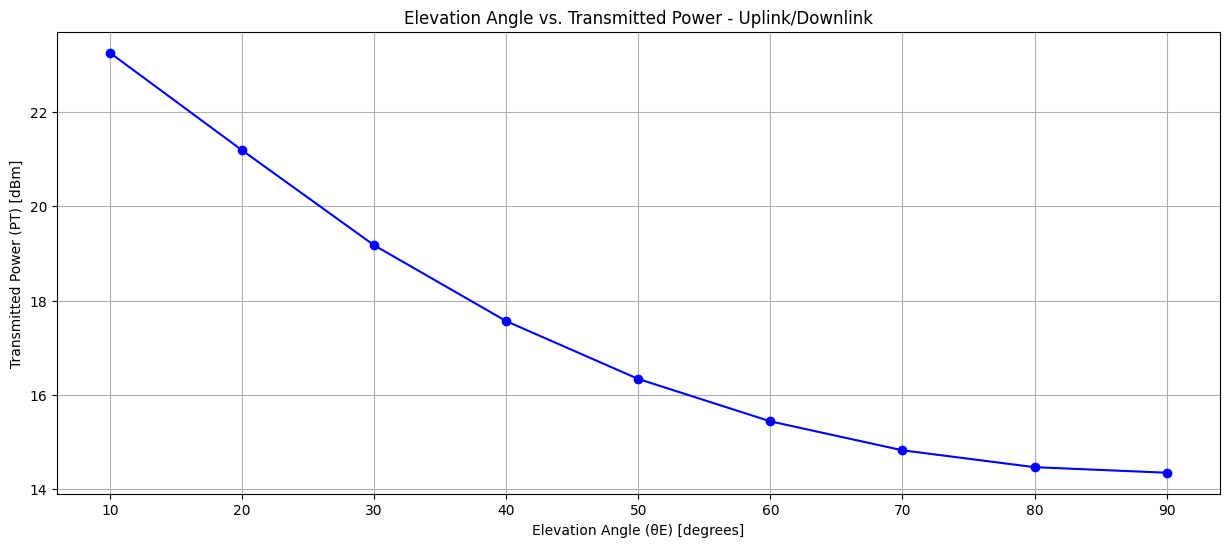

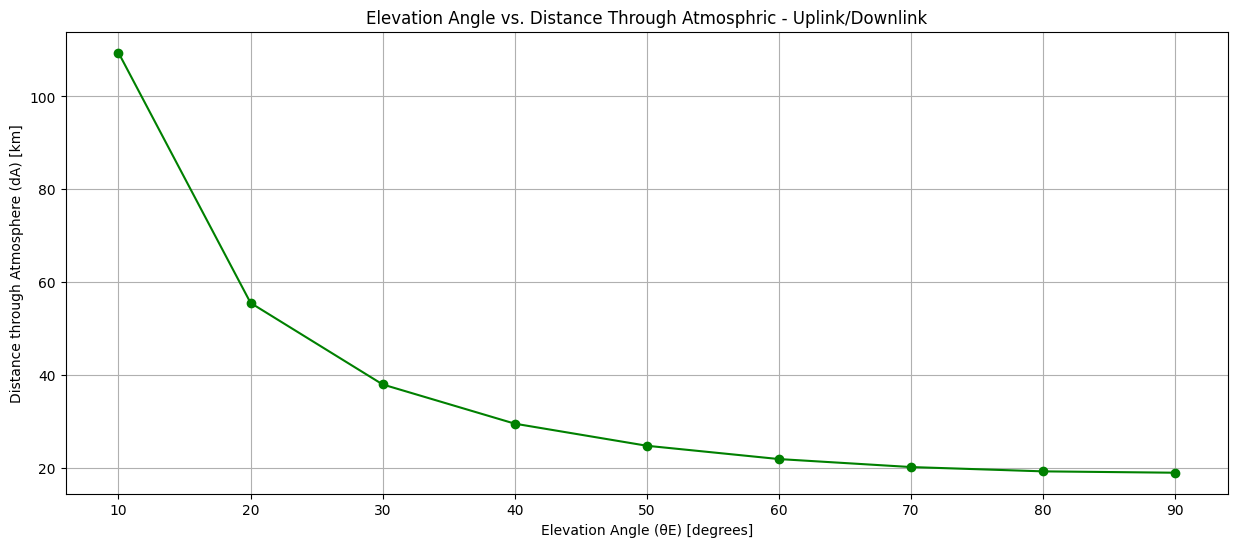

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
sigma_T = 1.5e-6  # Transmitter pointing error (radians)
sigma_R = 1.5e-6  # Receiver pointing error (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM_dB = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
hS = 550  # Altitude of satellite in km

# Convert receiver sensitivity from dBm to watts
P_req = 10**(P_req_dBm / 10) / 1000  # in watts

# Earth and Ground Station properties
RE = 6378.1  # Radius of the Earth in km
hE = 1  # Ground station height above mean sea level in km

# Optical efficiencies, gains, and pointing losses in dB
eta_T_dB = 10 * np.log10(eta_T)
eta_R_dB = 10 * np.log10(eta_R)
G_T_dB = 10 * np.log10(16 / theta_T**2)  # Transmitter gain in dB
G_R_dB = 10 * np.log10((D_R * np.pi / wavelength)**2)  # Receiver gain in dB
L_T_dB = 10 * np.log10(np.exp(-G_T_dB * sigma_T**2))  # Transmitter pointing loss in dB
L_R_dB = 10 * np.log10(np.exp(-G_R_dB * sigma_R**2))  # Receiver pointing loss in dB

# Function to calculate slant distance
def calc_dGS(hS, thetaE):
    R = RE + hE
    H = hS - hE
    dGS = R * (np.sqrt(((R + H) / R)**2 - (np.cos(np.radians(thetaE)))**2) - np.sin(np.radians(thetaE)))
    return dGS

# Function to calculate free-space path loss
def calc_LPG(dGS):
    LPG = (wavelength / (4 * np.pi * dGS * 1e3))**2  # Convert dGS from km to meters
    LPG_dB = -10 * np.log10(LPG)  # Free-space path loss in dB
    return LPG_dB

# Function to calculate Mie scattering loss (Im)
def calc_Im(thetaE):
    # Coefficients for the wavelength 1.55 μm
    a = -0.000545 * (1.55)**2 + 0.002 * 1.55 - 0.0038
    b = 0.00628 * (1.55)**2 - 0.0232 * 1.55 + 0.00439
    c = -0.028 * (1.55)**2 + 0.101 * 1.55 - 0.18
    d = -0.228 * (1.55)**3 + 0.922 * (1.55)**2 - 1.26 * 1.55 + 0.719

    # Altitude h = 1 km
    h = 1

    # Calculate rho
    rho = a * h**3 + b * h**2 + c * h + d

    # Calculate Im using rho and thetaE
    Im = np.exp(-rho / np.sin(np.radians(thetaE)))
    Im_dB = 10 * np.log10(Im)
    return Im_dB

# Function to calculate atmospheric attenuation due to geometrical scattering
def calc_Ig(hA, hE, thetaE):
    LW = 0.5  # Liquid water content in g/m^3
    N = 3.128e-4  # Cloud number concentration in cm^-3
    phi = 1.6  # Particle size related coefficient
    V = 1.002 / (LW * N)**0.6473
    thetaA = (3.91 / V) * (wavelength / 550e-9)**(-phi)  # Convert wavelength to meters
    dA = (hA - hE) / np.sin(np.radians(thetaE))
    Ig = np.exp(np.clip(-thetaA * dA, -700, 700))  # Clipping to avoid overflow
    Ig_dB = 10 * np.log10(Ig)  # Corrected calculation of Ig in dB
    return Ig_dB, dA

# Function to calculate total atmospheric attenuation
def calc_LA(Im_dB, Ig_dB):
    LA_dB = Im_dB + Ig_dB
    return LA_dB

# Function to calculate transmitted power
def calc_PT(P_req_dBm, LPG_dB, LA_dB, L_T_dB, L_R_dB, eta_T_dB, eta_R_dB, G_T_dB, G_R_dB):
    PT_dBm = P_req_dBm - eta_T_dB - eta_R_dB - G_T_dB - G_R_dB + L_T_dB + L_R_dB + LA_dB + LPG_dB + LM_dB
    PT_W = 10**((PT_dBm - 30) / 10)
    return PT_dBm, PT_W

# Arrays to store results
thetaE_values = np.arange(10, 100, 10)
dGS_values = []
LPG_values = []
Im_values = []
Ig_values = []
LA_values = []
PT_dBm_values = []
PT_W_values = []
dA_values = []

for thetaE in thetaE_values:
    dGS = calc_dGS(hS, thetaE)
    LPG_dB = calc_LPG(dGS)
    Im_dB = calc_Im(thetaE)
    Ig_dB, dA = calc_Ig(hA=20, hE=hE, thetaE=thetaE)  # hA is the height of the troposphere layer of atmosphere in km
    LA_dB = calc_LA(Im_dB, Ig_dB)
    PT_dBm, PT_W = calc_PT(P_req_dBm, LPG_dB, LA_dB, L_T_dB, L_R_dB, eta_T_dB, eta_R_dB, G_T_dB, G_R_dB)

    dGS_values.append(dGS)
    LPG_values.append(LPG_dB)
    Im_values.append(Im_dB)
    Ig_values.append(Ig_dB)
    LA_values.append(LA_dB)
    PT_dBm_values.append(PT_dBm)
    PT_W_values.append(PT_W)
    dA_values.append(dA)

# Create a DataFrame to display the results
data = {
    'thetaE (degrees)': thetaE_values,
    'dGS (km)': dGS_values,
    'dA (km)': dA_values,
    'LPG (dB)': LPG_values,
    'Im (dB)': Im_values,
    'Ig (dB)': Ig_values,
    'LA (dB)': LA_values,
    'PT (dBm)': PT_dBm_values,
    'PT (W)': PT_W_values
}

df = pd.DataFrame(data)
df = df.round(2)

# Display the DataFrame
print(df)

# Plotting PT against elevation angle
plt.figure(figsize=(15, 6))
plt.plot(thetaE_values, PT_dBm_values, marker='o', linestyle='-', color='b')
plt.title('Elevation Angle vs. Transmitted Power - Uplink/Downlink')
plt.xlabel('Elevation Angle (θE) [degrees]')
plt.ylabel('Transmitted Power (PT) [dBm]')
plt.grid(True)
plt.show()

# Plotting dA against elevation angle
plt.figure(figsize=(15, 6))
plt.plot(thetaE_values, dA_values, marker='o', linestyle='-', color='g')
plt.title('Elevation Angle vs. Distance Through Atmosphric - Uplink/Downlink')
plt.xlabel('Elevation Angle (θE) [degrees]')
plt.ylabel('Distance through Atmosphere (dA) [km]')
plt.grid(True)
plt.show()

# **Effect of Link Margin on Transmitted Power vs Link Distance (Inter-Satellite Links)**

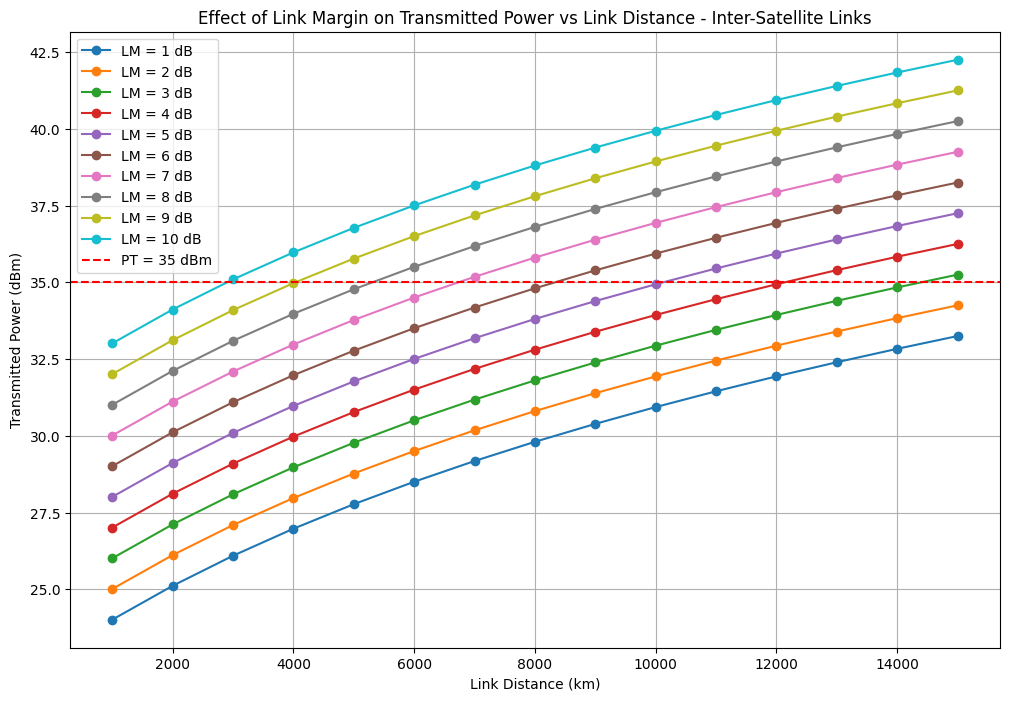

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Constants for Inter-Satellite Links
lambda_nm = 1550  # Wavelength in nm
lambda_m = lambda_nm * 1e-9  # Wavelength in meters
eta_T = 0.85  # Updated transmitter optical efficiency
eta_R = 0.85  # Updated receiver optical efficiency
D_R = 80e-3  # Receiver telescope diameter in meters
Theta_T = 15e-6  # Full transmitting divergence angle in radians
P_req_dBm = -35.5  # Receiver sensitivity in dBm

# Convert P_req to linear scale (mW)
P_req_mW = 10**((P_req_dBm - 30) / 10)

# Function to calculate inter-satellite distance
def calculate_inter_satellite_distance(h_S, theta_E):
    R_E = 6378.1  # Radius of Earth in km
    return 2 * (R_E + h_S) * np.sin(theta_E / 2)

# Function to calculate free-space path loss (LPG)
def calculate_LPG(d_ISL):
    L_PG = (lambda_m / (4 * np.pi * d_ISL * 1e3))**2
    return 10 * np.log10(L_PG)

# Function to calculate transmitter gain (GT) and receiver gain (GR)
def calculate_gains(Theta_T, D_R):
    G_T = 16 / (Theta_T ** 2)
    G_R = (D_R * np.pi / lambda_m) ** 2
    return G_T, G_R

# Main calculation loop to analyze the effect of Link Margin (LM) over inter-satellite distances
LM_values = np.arange(1, 11, 1)  # LM values from 1 dB to 10 dB
h_S_values = np.arange(1000, 16000, 1000)  # Satellite heights from 1000 km to 15000 km
theta_E = np.deg2rad(30)  # Elevation angle between satellites in radians (example value)
results = []

for h_S in h_S_values:
    for LM_dB in LM_values:
        LM = 10**(LM_dB / 10)  # Convert LM from dB to linear scale

        # Step 1: Calculate inter-satellite distance
        d_ISL = calculate_inter_satellite_distance(h_S, theta_E)

        # Step 2: Calculate free-space path loss (LPG)
        L_PG = calculate_LPG(d_ISL)

        # Step 3: Calculate gains (GT and GR)
        G_T, G_R = calculate_gains(Theta_T, D_R)

        # Step 4: Calculate transmission power (PT) in mW
        P_T_mW = LM * P_req_mW / (eta_T * eta_R * G_T * G_R * 10**(L_PG / 10))

        # Convert PT to dBm
        P_T_dBm = 10 * np.log10(P_T_mW) + 30

        results.append((h_S, LM_dB, P_T_dBm))

# Convert results to a numpy array for easier plotting
results = np.array(results)

# Plotting the results for each LM value
plt.figure(figsize=(12, 8))

for LM_dB in LM_values:
    subset = results[results[:, 1] == LM_dB]
    plt.plot(subset[:, 0], subset[:, 2], marker='o', linestyle='-', label=f'LM = {LM_dB} dB')

plt.axhline(35, color='r', linestyle='--', label='PT = 35 dBm')
plt.xlabel('Link Distance (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Effect of Link Margin on Transmitted Power vs Link Distance - Inter-Satellite Links')
plt.grid(True)
plt.legend()
plt.show()


# **Effect of Link Margin on Transmission Power vs Altitude of the Satellite - Uplink/Downlink**

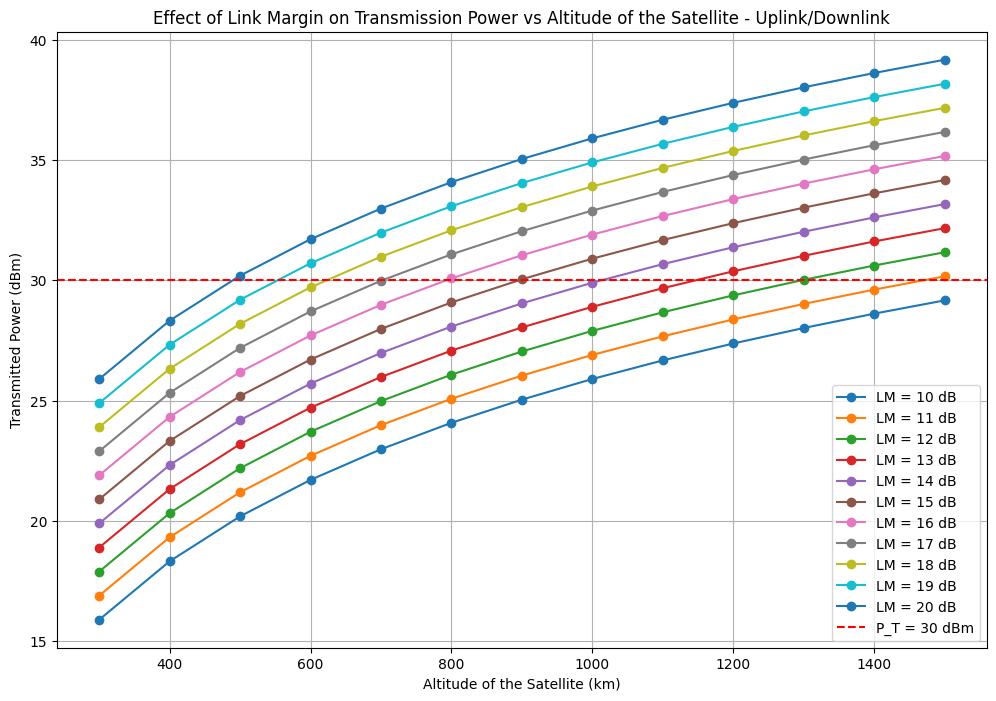

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Constants
lambda_nm = 1550  # Wavelength in nm
lambda_m = lambda_nm * 1e-9  # Wavelength in meters
eta_T = 0.85  # Updated transmitter optical efficiency
eta_R = 0.85  # Updated receiver optical efficiency
D_R = 80e-3  # Receiver telescope diameter in meters
theta_T = 1.5e-6  # Updated transmitter pointing error in radians
theta_R = 1.5e-6  # Updated receiver pointing error in radians
Theta_T = 15e-6  # Full transmitting divergence angle in radians
P_req_dBm = -35.5  # Receiver sensitivity in dBm

# Convert P_req to linear scale (mW)
P_req_mW = 10**((P_req_dBm - 30) / 10)

# Function to calculate slant distance
def calculate_slant_distance(h_S):
    R_E = 6378.1  # Radius of Earth in km
    h_E = 1  # Height of ground station in km
    theta_E = np.deg2rad(40)  # Elevation angle in radians
    R = R_E + h_E
    H = h_S - h_E
    d_GS = R * (np.sqrt(((R + H) / R)**2 - (np.cos(theta_E))**2) - np.sin(theta_E))
    return d_GS

# Function to calculate free-space path loss (LPG)
def calculate_LPG(d_GS):
    L_PG = (lambda_m / (4 * np.pi * d_GS * 1e3))**2
    return 10 * np.log10(L_PG)

# Function to calculate transmitter gain (GT) and receiver gain (GR)
def calculate_gains(Theta_T, D_R):
    G_T = 16 / (Theta_T ** 2)
    G_R = (D_R * np.pi / lambda_m) ** 2
    return G_T, G_R

# Function to calculate pointing losses (LT and LR)
def calculate_pointing_losses(G_T, G_R, theta_T, theta_R):
    L_T = np.exp(-G_T * theta_T**2)
    L_R = np.exp(-G_R * theta_R**2)
    return L_T, L_R

# Function to calculate Mie scattering loss (Im)
def calculate_Im():
    # Coefficients for the wavelength 1.55 μm
    a = -0.000545 * (1.55)**2 + 0.002 * 1.55 - 0.0038
    b = 0.00628 * (1.55)**2 - 0.0232 * 1.55 + 0.00439
    c = -0.028 * (1.55)**2 + 0.101 * 1.55 - 0.18
    d = -0.228 * (1.55)**3 + 0.922 * (1.55)**2 - 1.26 * 1.55 + 0.719

    # Altitude h = 1 km
    h = 1

    # Calculate rho
    rho = a * h**3 + b * h**2 + c * h + d

    # Calculate Im using rho and thetaE
    theta_E = np.deg2rad(40)  # Elevation angle in radians
    Im = np.exp(-rho / np.sin(theta_E))
    Im_dB = 10 * np.log10(Im)
    return Im_dB

# Function to calculate geometrical scattering loss (Ig)
def calculate_Ig():
    LW = 0.5  # Liquid water content in g/m^3
    N = 3.128e-4  # Cloud number concentration in cm^-3
    phi = 1.6  # Particle size related coefficient
    V = 1.002 / (LW * N)**0.6473
    thetaA = (3.91 / V) * (lambda_m / 550e-9)**(-phi)

    # Distance through atmosphere
    hA = 20  # Troposphere layer height in km
    dA = (hA - 1) / np.sin(np.deg2rad(40))

    # Calculate Ig
    Ig = np.exp(-thetaA * dA)
    Ig_dB = 10 * np.log10(Ig)
    return Ig_dB

# Main calculation loop to analyze the effect of Link Margin (LM) over a range of satellite heights
LM_values = np.arange(10, 21, 1)  # LM values from 5 dB to 15 dB
h_S_values = np.arange(300, 1600, 100)  # Satellite heights from 300 km to 1500 km
results = []

for h_S in h_S_values:
    for LM_dB in LM_values:
        LM = 10**(LM_dB / 10)  # Convert LM from dB to linear scale

        # Step 1: Calculate slant distance
        d_GS = calculate_slant_distance(h_S)

        # Step 2: Calculate free-space path loss (LPG)
        L_PG = calculate_LPG(d_GS)

        # Step 3: Calculate gains (GT and GR)
        G_T, G_R = calculate_gains(Theta_T, D_R)

        # Step 4: Calculate pointing losses (LT and LR)
        L_T, L_R = calculate_pointing_losses(G_T, G_R, theta_T, theta_R)

        # Step 5: Calculate atmospheric loss (LA)
        Im_dB = calculate_Im()
        Ig_dB = calculate_Ig()
        L_A_dB = Im_dB + Ig_dB  # Combining Mie and geometrical scattering

        # Step 6: Calculate transmission power (PT) in mW
        P_T_mW = LM * P_req_mW / (eta_T * eta_R * G_T * G_R * L_T * L_R * 10**(L_A_dB / 10) * 10**(L_PG / 10))

        # Convert PT to dBm
        P_T_dBm = 10 * np.log10(P_T_mW) + 30

        results.append((h_S, LM_dB, P_T_dBm))

# Convert results to a numpy array for easier plotting
results = np.array(results)

# Plotting the results for each LM value
plt.figure(figsize=(12, 8))

for LM_dB in LM_values:
    subset = results[results[:, 1] == LM_dB]
    plt.plot(subset[:, 0], subset[:, 2], marker='o', linestyle='-', label=f'LM = {LM_dB} dB')

plt.axhline(30, color='r', linestyle='--', label='P_T = 30 dBm')
plt.xlabel('Altitude of the Satellite (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Effect of Link Margin on Transmission Power vs Altitude of the Satellite - Uplink/Downlink')
plt.grid(True)
plt.legend()
plt.show()

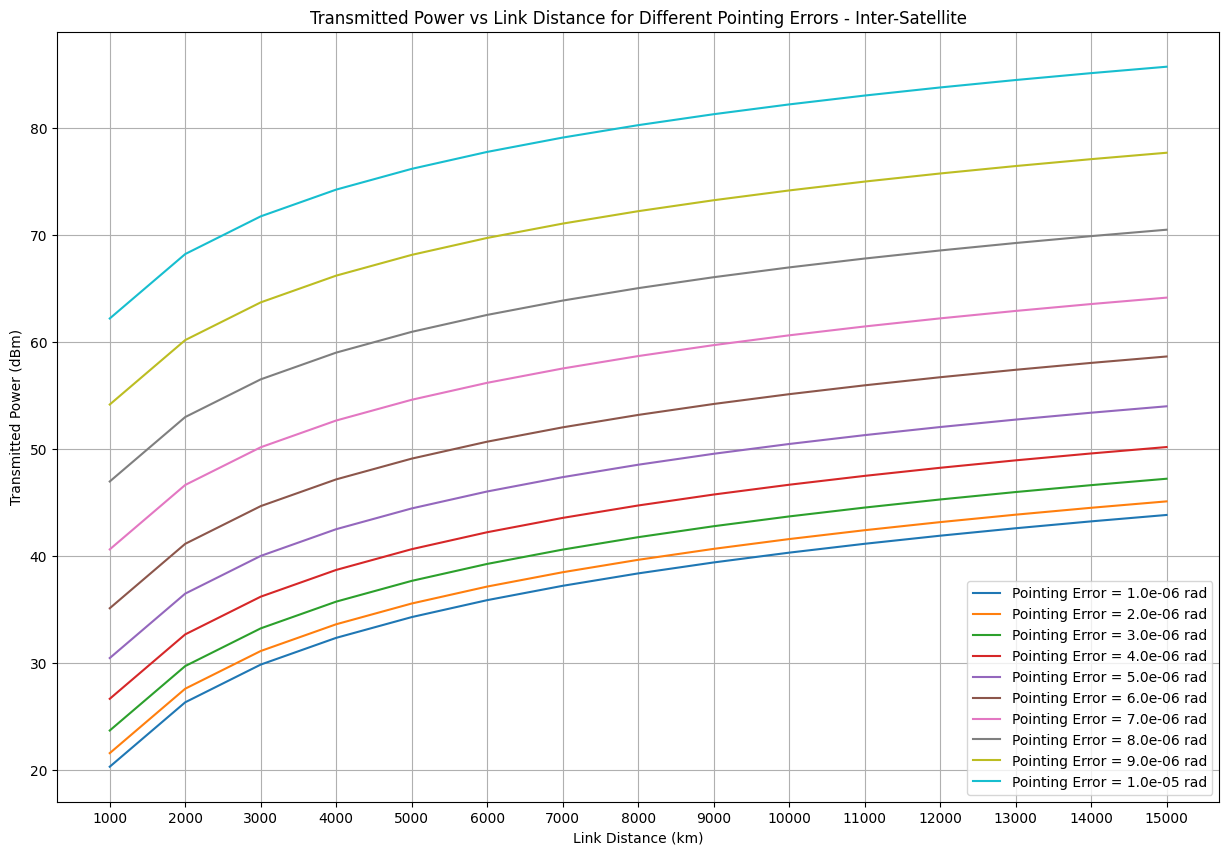

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)
wavelength = 1550e-9  # Wavelength (1550 nm)
eta_T = 0.85  # Transmitter optics efficiency
eta_R = 0.85  # Receiver optics efficiency
theta_T = 15e-6  # Transmitter divergence angle (radians)
D_R = 80e-3  # Receiver's telescope diameter (m)
LM = 3  # Link margin (dB)
P_req_dBm = -30  # Receiver sensitivity (dBm)
P_req = 10**(P_req_dBm / 10) / 1000  # Receiver sensitivity (W)

# Function to calculate Inter-Satellite Link Budget with different pointing errors
def inter_satellite_link_budget(d_SS, sigma_T, sigma_R):
    G_T = 16 / theta_T**2  # Transmitter Gain (approximation)
    G_R = (np.pi * D_R / wavelength)**2  # Receiver Gain

    # Corrected Pointing Loss calculations using the provided formulas
    L_T = np.exp(-G_T * sigma_T**2)  # Transmitter Pointing Loss
    L_R = np.exp(-G_R * sigma_R**2)  # Receiver Pointing Loss

    L_PS = (wavelength / (4 * np.pi * d_SS))**2  # Free-space Path Loss
    L_PS_dB = 10 * np.log10(L_PS)
    P_R = P_req * 10**(LM / 10)  # Convert link margin from dB
    P_T = P_R / (eta_T * eta_R * G_T * G_R * L_T * L_R * L_PS)
    P_T_dBm = 10 * np.log10(P_T * 1000)  # Convert W to dBm
    return L_PS_dB, P_T_dBm, P_T

# Distance range in 1000 km intervals
d_SS_range = np.arange(1000e3, 16000e3, 1000e3)  # Distances from 1000 km to 15000 km

# Pointing errors from 1e-6 to 10e-6 in 10 steps
pointing_errors = np.linspace(1e-6, 10e-6, 10)

# Plotting
plt.figure(figsize=(15, 10))

for sigma_T in pointing_errors:
    sigma_R = sigma_T  # Assuming same pointing error for both transmitter and receiver
    # Calculate parameters for each pointing error scenario
    results = [inter_satellite_link_budget(d_SS, sigma_T, sigma_R) for d_SS in d_SS_range]
    L_PS_dB_vals, P_T_dBm_vals, P_T_W_vals = zip(*results)

    # Plot Transmission Power (dBm)
    plt.plot(d_SS_range / 1e3, P_T_dBm_vals, label=f'Pointing Error = {sigma_T:.1e} rad')

# Finalize plots for Transmission Power (dBm)
plt.xlabel('Link Distance (km)')
plt.ylabel('Transmitted Power (dBm)')
plt.title('Transmitted Power vs Link Distance for Different Pointing Errors - Inter-Satellite')
plt.xticks(np.arange(1000, 16000, 1000))
plt.legend()
plt.grid(True)
plt.show()
